## Немного теории

**Реляционная база данных** (РБД, или далее в контексте просто БД) представляет из себя совокупность таблиц, связанных между собой. Если говорить грубо, то БД – файл в котором данные хранятся в структурированном виде.

**СУБД** – Система Управления этими Базами Данных, т.е. это комплекс инструментов для работы с конкретным типом БД (MS SQL, Oracle, MySQL, Firebird, …).

**Таблица** представляет из себя совокупность столбцов. Столбцы, так же могут называть полями или колонками, все эти слова будут использоваться как синонимы, выражающие одно и тоже.

**Таблица** – это главный объект РБД, все данные РБД хранятся построчно в столбцах таблицы. Строки, записи – тоже синонимы.

**SQL** — язык позволяющий осуществлять запросы в БД посредством СУБД. В конкретной СУБД, язык SQL может иметь специфичную реализацию (свой диалект).

## Пример схемы БД:

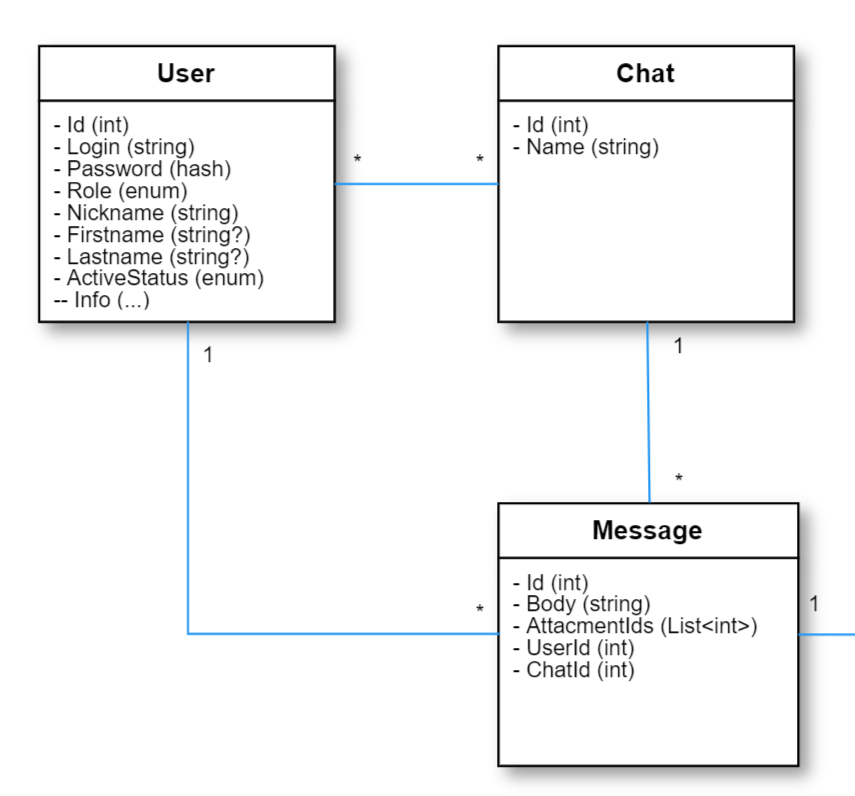

Типы связей
Таблицы могут быть связаны между собой следующими видами связей:

- one-to-one - когда одной строке таблицы соответсвует равно одна запись в другой. Например таблица с клиентами и таблица с их адрессами. Каждому клиенту соответсвует один адресс и каждому адрессу соответсвует один клиент.
- one-to-many - когда одной строке таблицы соответствует много записей в другой. Например, "пользователь" и "комментарий" - пользователь может оставить много комментариев, но у комментария может быть только один автор.
- many-to-many - когда многим записям таблицы соответствует много записей в другой. Например, "пользователь" и "сообщество" - пользователь может вступать во много сообществ, и у сообщества может быть много пользователей.

Вопросы

- Какой тип связи между User и Message?
- Какой тип связи между Chat и Message?
- Какой тип связи между User и Chat?

## Практика

Введение в синтаксис будет рассмотрено на примере открытой базы данных, предназначенной специально для практики SQL. Чтобы обучение прошло максимально быстро и эффективно ткрой ссылку ниже в новой вкладке и сразу запускай приведенные примеры, это позволит тебе лучше закрепить материал и самостоятельно поработать с синтаксисом.

[Кликнуть здесь](https://www.w3schools.com/sql/trysql.asp?filename=trysql_op_in)

### Структура sql-запросов

Общая структура запроса выглядит следующим образом:

In [ ]:
SELECT ('столбцы или * для выбора всех столбцов; обязательно')
FROM ('таблица; обязательно')
WHERE ('условие/фильтрация, например, city = 'Moscow'; необязательно')
GROUP BY ('столбец, по которому хотим сгруппировать данные; необязательно')
HAVING ('условие/фильтрация на уровне сгруппированных данных; необязательно')
ORDER BY ('столбец, по которому хотим отсортировать вывод; необязательно')

### SELECT, FROM

SELECT, FROM — обязательные элементы запроса, которые определяют выбранные столбцы, их порядок и источник данных.

Выбрать все (обозначается как *) из таблицы Customers:

In [ ]:
SELECT * FROM Customers

Выбрать столбцы CustomerID, CustomerName из таблицы Customers:

In [ ]:
SELECT CustomerID, CustomerName FROM Customers

**Задание** 

Из таблицы Categories выбрать столбец CategoryName

### WHERE

WHERE — необязательный элемент запроса, который используется, когда нужно отфильтровать данные по нужному условию. Очень часто внутри элемента where используются IN / NOT IN для фильтрации столбца по нескольким значениям, AND / OR для фильтрации таблицы по нескольким столбцам.

Фильтрация по одному условию и одному значению:

In [ ]:
select * from Customers
WHERE City = 'London'

Фильтрация по одному условию и нескольким значениям с применением IN (включение) или NOT IN (исключение):

In [ ]:
select * from Customers
where City IN ('London', 'Berlin')

**Задание**

Вывести всех покупателей не из городов 'Madrid', 'Berlin','Bern'

Фильтрация по нескольким условиям с применением AND (выполняются все условия) или OR (выполняется хотя бы одно условие) и нескольким значениям:

In [ ]:
select * from Customers
where Country = 'Germany' AND City not in ('Berlin', 'Aachen') AND CustomerID > 15

**Задание**

Вывести всех покупателей из городов 'London', 'Berlin' чей CustomerID > 4

### GROUP BY

GROUP BY — необязательный элемент запроса, с помощью которого можно задать агрегацию по нужному столбцу (например, если нужно узнать какое количество клиентов живет в каждом из городов).

При использовании GROUP BY обязательно:

перечень столбцов, по которым делается разрез, был одинаковым внутри SELECT и внутри GROUP BY,
агрегатные функции (SUM, AVG, COUNT, MAX, MIN) должны быть также указаны внутри SELECT с указанием столбца, к которому такая функция применяется.

Группировка количества клиентов по городу:

In [ ]:
select City, count(CustomerID) from Customers
GROUP BY City

Группировка количества клиентов по стране и городу:

In [ ]:
select Country, City, count(CustomerID) from Customers
GROUP BY Country, City

Группировка продаж с фильтрацией исходной таблицы. В данном случае на выходе будет таблица с количеством клиентов по городам Германии:

**Задание**

Подсчитать количество покупателей по городам из страны 'Germany' 

Переименование столбца с агрегацией с помощью оператора **AS**. По умолчанию название столбца с агрегацией равно примененной агрегатной функции, что далее может быть не очень удобно для восприятия.

In [ ]:
select City, count(CustomerID) AS Number_of_clients from Customers
group by City

### HAVING

HAVING — необязательный элемент запроса, который отвечает за фильтрацию на уровне сгруппированных данных (по сути, WHERE, но только на уровень выше).

Фильтрация агрегированной таблицы с количеством клиентов по городам, в данном случае оставляем в выгрузке только те города, в которых не менее 5 клиентов:

In [ ]:
select City, count(CustomerID) from Customers
group by City
HAVING count(CustomerID) >= 5 

В случае с переименованным столбцом внутри HAVING можно указать как и саму агрегирующую конструкцию count(CustomerID), так и новое название столбца number_of_clients:

In [ ]:
select City, count(CustomerID) as number_of_clients from Customers
group by City
HAVING number_of_clients >= 5

**Задание**

Сделайте запрос в котором сначала фильтруется исходная таблица исключая покупателей 'Around the Horn','Drachenblut Delikatessend',далее рассчитывается количество клиентов по городам и остаются только те города, где количество клиентов не менее 5:

ORDER BY

ORDER BY — необязательный элемент запроса, который отвечает за сортировку таблицы.

Простой пример сортировки по одному столбцу. В данном запросе осуществляется сортировка по городу, который указал клиент:

In [ ]:
select * from Customers
ORDER BY City

По умолчанию сортировка происходит по возрастанию для чисел и в алфавитном порядке для текстовых значений. Если нужна обратная сортировка, то в конструкции ORDER BY после названия столбца надо добавить DESC:

In [ ]:
select * from Customers
order by CustomerID DESC

### JOIN

JOIN — необязательный элемент, используется для объединения таблиц по ключу, который присутствует в обеих таблицах. Перед ключом ставится оператор ON.

Запрос, в котором соединяем таблицы Order и Customer по ключу CustomerID, при этом перед названиям столбца ключа добавляется название таблицы через точку:

In [ ]:
select * from Orders
JOIN Customers ON Orders.CustomerID = Customers.CustomerID

Нередко может возникать ситуация, когда надо промэппить одну таблицу значениями из другой. В зависимости от задачи, могут использоваться разные типы присоединений. INNER JOIN — пересечение, RIGHT/LEFT JOIN для мэппинга одной таблицы знаениями из другой,

In [ ]:
select * from Orders
join Customers on Orders.CustomerID = Customers.CustomerID
where Customers.CustomerID >10

Внутри всего запроса JOIN встраивается после элемента from до элемента where, пример запроса:

Другие типы JOIN'ов можно увидеть на замечательной картинке ниже:

![sql join](https://habrastorage.org/r/w1560/storage3/263/56b/400/26356b400ca9075ac90491edd6623eae.png)

**Задание**

Взять таблицу Product, присоединить к ней таблицу Category по ключу CategoryID. Вывести категорию для товаров "Tofu" и "Ikura"

## Практика на Python

Python имеет встроенную поддержку SQLite базы данных, для этого вам не надо ничего дополнительно устанавливать, достаточно в скрипте указать импорт стандартной библиотеки

Так же импортируем Python, поскольку именно из него мы будем делать запросы

In [2]:
import sqlite3
import pandas as pd

Будем создавать вот эту таблицу:

![](https://ucarecdn.com/bad26356-5e34-4945-a9d4-0748686a6b54/)

Будем создавать свою базу данных и работать с ней

Создадим три таблицы: книги, жанры, авторы

In [3]:
sql = sqlite3.connect('../data/Book_market.db')

In [5]:
# Создаем таблицу с предметами
genre = ["Роман", "Поэзия", "Приключения"]
genre_df = pd.DataFrame({'name_genre': genre})
genre_df

,name_genre
0,Роман
1,Поэзия
2,Приключения


In [7]:
genre_df.to_sql('genre', sql, index_label="id", if_exists='replace') # Сохраним в базу
pd.read_sql("SELECT * FROM genre", sql) # Проверим, что сохранилось правильно

,id,name_genre
0,0,Роман
1,1,Поэзия
2,2,Приключения


In [12]:
# Создаем таблицу с учителями
author = ["Булгаков М.А.", "Достоевский Ф.М.", "Есенин С.А.", "Пастернак Б.Л.", "Лермонтов М.Ю."]
authors_df = pd.DataFrame({'name_author': author})
authors_df

,name_author
0,Булгаков М.А.
1,Достоевский Ф.М.
2,Есенин С.А.
3,Пастернак Б.Л.
4,Лермонтов М.Ю.


In [13]:
authors_df.to_sql('author', sql, index_label="id", if_exists="replace") # Сохраним в базу
pd.read_sql("SELECT * FROM author", sql) # Проверим, что сохранилось правильно

,id,name_author
0,0,Булгаков М.А.
1,1,Достоевский Ф.М.
2,2,Есенин С.А.
3,3,Пастернак Б.Л.
4,4,Лермонтов М.Ю.


In [10]:
title = ['Мастер и Маргарита', "Белая гвардия", "Идиот", "Братья Карамазовы",
         "Игрок", "Стихотворения и поэмы", 'Черный человек', 'Лирика']
author_id = [1, 1, 2, 2, 2, 3, 3, 4]
genre_id = [1, 1, 1, 1, 1, 2, 2, 2]
price = [670, 540, 460, 799, 480, 650, 570, 518]
amount = [3, 5, 10, 2, 10, 15, 6, 2]

book_df = pd.DataFrame({
    'title': title,
    'author_id': author_id,
    'genre_id': genre_id,
    'price': price,
    'amount': amount
})

book_df

,title,author_id,genre_id,price,amount
0,Мастер и Маргарита,1,1,670,3
1,Белая гвардия,1,1,540,5
2,Идиот,2,1,460,10
3,Братья Карамазовы,2,1,799,2
4,Игрок,2,1,480,10
5,Стихотворения и поэмы,3,2,650,15
6,Черный человек,3,2,570,6
7,Лирика,4,2,518,2


In [11]:
book_df.to_sql("book", sql, index_label="id", if_exists="replace")
pd.read_sql("SELECT * FROM book", sql)

,id,title,author_id,genre_id,price,amount
0,0,Мастер и Маргарита,1,1,670,3
1,1,Белая гвардия,1,1,540,5
2,2,Идиот,2,1,460,10
3,3,Братья Карамазовы,2,1,799,2
4,4,Игрок,2,1,480,10
5,5,Стихотворения и поэмы,3,2,650,15
6,6,Черный человек,3,2,570,6
7,7,Лирика,4,2,518,2


**Задание 1**

Объединить таблицы при помощи SQL, так чтобы в таблице book вместо author_id и genre_id были имена авторов и названия жанров

In [20]:
pd.read_sql(
    """
    SELECT b.title as title,
    a.name_author as name_author,
    g.name_genre as name_genre,
    b.price,
    b.amount
    FROM book AS b
    LEFT JOIN author AS a ON a.id = b.author_id
    LEFT JOIN genre AS g ON g.id = b.genre_id
    """,
    sql)

,title,name_author,name_genre,price,amount
0,Мастер и Маргарита,Достоевский Ф.М.,Поэзия,670,3
1,Белая гвардия,Достоевский Ф.М.,Поэзия,540,5
2,Идиот,Есенин С.А.,Поэзия,460,10
3,Братья Карамазовы,Есенин С.А.,Поэзия,799,2
4,Игрок,Есенин С.А.,Поэзия,480,10
5,Стихотворения и поэмы,Пастернак Б.Л.,Приключения,650,15
6,Черный человек,Пастернак Б.Л.,Приключения,570,6
7,Лирика,Лермонтов М.Ю.,Приключения,518,2


**Задание 2**

Создать таблицу buy_book согласно схеме.

Заполнить таблицу следующими значениями:



In [24]:
buy_id = [1, 1, 1, 2, 3, 3, 3, 4]
book_id = [1, 7, 3, 8, 3, 2, 1, 5]
amount = [1, 2, 1, 2, 2, 1, 1, 1]

# Ваш код здесь

**Задание 3**

Посчитать, сколько раз была заказана каждая книга, для книги вывести ее автора (нужно посчитать, в каком количестве заказов фигурирует каждая книга).  Вывести фамилию и инициалы автора, название книги, последний столбец назвать Количество. Результат отсортировать сначала  по фамилиям авторов, а потом по названиям книг.

In [25]:
# Ваш код здесь

**Задание 3**

Найти преподавателя с наименьшим средним баллом по его предметам

In [26]:
# Ваш код здесь

## Полезные ссылки
[Интерактивный тренажер по SQL](https://stepik.org/course/63054) Для будущих аналиток данных обязательно!


## Домашняя работа
Нужно придумать небольшую базу данных и написать к ней запросы.

В базе должно быть минимум 4 таблицы и хотя бы две связи вида one-to-many или many-to-many. Можно решить как при помощи pandas, так и при помощи SQL.

Запросы должны быть осмысленными и должны решать какую-то задачу.

### Easy
Выгрузить данные и отфильтровать их по какому-то значению.

### Normal
Написать запрос на объединение двух или более таблиц, также в запросе должна быть фильтрация

### Hard
Написать запрос, который посчитает какую-то сложную аналитику по БД, используя как можно больше таблиц. Построить графики и сделать выводы.